## load CMIP6 tas, huss, swbgt 75th percentile warming patterns and plot maps of warming patterns

In [1]:
data_path  =    '/Users/lukeaparsons/Documents/Manuscripts/CMIP6_HeatPatterns/data/'

In [2]:
# Import modules

import warnings
warnings.filterwarnings('ignore')
import os
import glob
import numpy as np
import xarray as xr
import xesmf as xe
from scipy import special #note this is used in Kjellstrom 2018 erf
import time as tm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
%matplotlib inline
import cartopy.util as cutil
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.basemap import Basemap, maskoceans
import matplotlib.cm as cm
import matplotlib as mpl

In [5]:
nc_tas = xr.open_dataset(data_path + 'tas_patterns_CMIP6_1pctCO2_MMMedian_Annual_JJA_DJF_75p_95p_99p_1x1_grid.nc')
nc_huss = xr.open_dataset(data_path + 'huss_patterns_CMIP6_1pctCO2_MMMedian_Annual_JJA_DJF_75p_95p_99p_1x1_grid.nc')
nc_swbgt = xr.open_dataset(data_path + 'swbgt_patterns_CMIP6_1pctCO2_MMMedian_Annual_JJA_DJF_75p_95p_99p_1x1_grid.nc')

LON = nc_swbgt['lon']
LAT = nc_swbgt['lat']

## load etopo data to mask oceans

In [6]:
# define the mask to mask out the oceans
nc = xr.open_dataset(data_path + 'etopo_regridded_mask_1x1_grid.nc')
elev = nc['elev'][:,:]

mask = elev.where(elev < 0 , 1) #keep all vals for mask where elev>0 (sea level)
mask = mask.where(mask > -50) #keep all vals for mask where elev>0 (sea level)
mask = mask.values

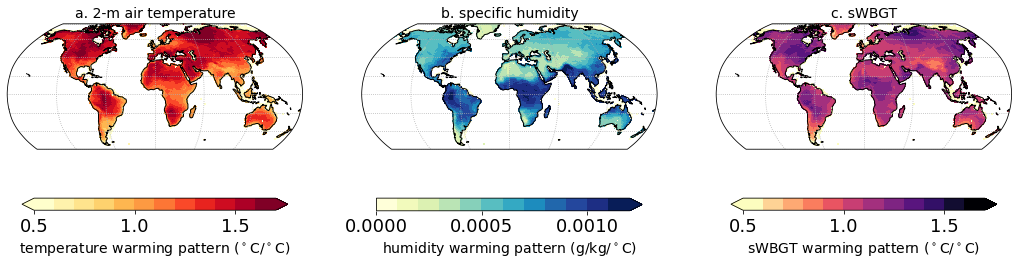

In [7]:

a = 1
b = 3

fig = plt.figure(figsize=(18,6))

extent = [-179.99, 179.99, -60, 80]
mpl.rcParams['hatch.color'] = 'grey'

ax = plt.subplot(a,b,1,projection = ccrs.Robinson(central_longitude=0))
ax.set_global()
ax.coastlines(resolution='110m', linewidth=1)
ax.set_extent(extent)
ax.gridlines(linestyle=':')
plotvalue = nc_tas['tas_pattern_75p']
plotvalue = plotvalue.where(xr.ufuncs.logical_not(plotvalue==0)) #regridder replaced values near 0 longitude with zero, so replace with Nan, then infill Nans
plotvalue = plotvalue.interpolate_na(dim='lon',method='linear', fill_value="extrapolate")
plotvalue = plotvalue * mask
#plotvalue[plotvalue == 0] = 'nan'
LON = nc_tas['tas_pattern_75p']['lon']
LAT = nc_tas['tas_pattern_75p']['lat']
im = plt.pcolormesh(LON,LAT,plotvalue,cmap=plt.cm.get_cmap('YlOrRd',12),transform=ccrs.PlateCarree())
#cs1 = ax.contourf(LON, LAT, slope_75p0_cv_stipple*mask, levels = [0,0.5,1], hatches=['','...'], alpha=0, transform=ccrs.PlateCarree())
plt.clim(0.5, 1.7)
plt.title('a. 2-m air temperature',fontsize=14,ha='center')
cbar=plt.colorbar(extend='both',orientation='horizontal',shrink=.9) #plot colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('temperature warming pattern ($^\circ$C/$^\circ$C)',fontsize=14)

ax = plt.subplot(a,b,2,projection = ccrs.Robinson(central_longitude=0))
ax.set_global()
ax.coastlines(resolution='110m', linewidth=1)
ax.set_extent(extent)
ax.gridlines(linestyle=':')
plotvalue = nc_huss['huss_pattern_75p']
plotvalue = plotvalue.where(xr.ufuncs.logical_not(plotvalue==0)) #regridder replaced values near 0 longitude with zero, so replace with Nan, then infill Nans
plotvalue = plotvalue.interpolate_na(dim='lon',method='linear', fill_value="extrapolate")
plotvalue = plotvalue * mask
LON = nc_huss['huss_pattern_75p']['lon']
LAT = nc_huss['huss_pattern_75p']['lat']
im = plt.pcolormesh(LON,LAT,plotvalue,cmap=plt.cm.get_cmap('YlGnBu',12),transform=ccrs.PlateCarree())
#cs1 = ax.contourf(LON, LAT, slope_75p3_cv_stipple*mask, levels = [0,0.5,1], hatches=['','...'], alpha=0, transform=ccrs.PlateCarree())
plt.clim(0, .0012)
plt.title('b. specific humidity',fontsize=14,ha='center')
cbar=plt.colorbar(extend='max',orientation='horizontal',shrink=.9) #plot colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('humidity warming pattern (g/kg/$^\circ$C)',fontsize=14)

ax = plt.subplot(a,b,3,projection = ccrs.Robinson(central_longitude=0))
ax.set_global()
ax.coastlines(resolution='110m', linewidth=1)
ax.set_extent(extent)
ax.gridlines(linestyle=':')
plotvalue = nc_swbgt['swbgt_pattern_75p']
plotvalue = plotvalue.where(xr.ufuncs.logical_not(plotvalue==0)) #regridder replaced values near 0 longitude with zero, so replace with Nan, then infill Nans
plotvalue = plotvalue.interpolate_na(dim='lon',method='linear', fill_value="extrapolate")
plotvalue = plotvalue * mask
LON = nc_swbgt['swbgt_pattern_75p']['lon']
LAT = nc_swbgt['swbgt_pattern_75p']['lat']
im = plt.pcolormesh(LON,LAT,plotvalue,cmap=plt.cm.get_cmap('magma_r',12),transform=ccrs.PlateCarree())
#cs1 = ax.contourf(LON, LAT, slope_75p4_cv_stipple*mask, levels = [0,0.5,1], hatches=['','...'], alpha=0, transform=ccrs.PlateCarree())
plt.clim(0.5, 1.7)
plt.title('c. sWBGT',fontsize=14,ha='center')
cbar=plt.colorbar(extend='both',orientation='horizontal',shrink=.9) #plot colorbar
cbar.ax.tick_params(labelsize=18)
cbar.set_label('sWBGT warming pattern ($^\circ$C/$^\circ$C)',fontsize=14)

#plt.savefig(FIGUREPATH + 'Figure2_WarmingPatterns.eps', format='eps')